What's New and Changed in version 2.8.210321
--------------------------------------------

Version 2.8.210321 supports **SAP HANA SPS05** and **SAP HANA Cloud**

Enhancement:

    - Enhanced sql() to enable multiline execution.
    - Enhanced save() to add append option.
    - Enhanced diff() to enable negative input.
    - Enhanced model report functionality of UnifiedClassification with added model and data visualization.
    - Enhanced dataset_report module with a optimized process of report generation and better user experience.
    - Enhanced UnifiedClustering to support 'distance_level' in AgglomerateHierarchicalClustering and DBSCAN functions. Please refer to documentation for details.
    - Enahnced model storage to support unified report.

New functions:

    - Added generate_html_report() and generate_notebook_iframe_report() functions for UnifiedRegression which could display the output, e.g. statistic and model.
    - APL Gradient Boosting: the **other_params** parameter is now supported.
    - APL all models: a new method, **get_model_info**, is created, allowing users to retrieve the summary and the performance metrics of a saved model.
    - APL all models: users can now specify the weight of explanatory variables via the **weight** parameter.
    - Added LSTM.
    - Added Text Mining functions support for both SAP HANA on-premise and cloud version.
        - tf_analysis
        - text_classification
        - get_related_doc
        - get_related_term
        - get_relevant_doc
        - get_relevant_term
        - get_suggested_term
    - Added unified report.

New dependency:

    - Added new dependency 'htmlmin' for generating dataset and model report.

API change:

    - KMeans with two added parameters 'use_fast_library' and 'use_float'.
    - UnifiedRegression with one added parameter 'build_report'.
    - Added a parameter 'distance_level' in UnifiedClustering when 'func' is AgglomerateHierarchicalClustering and DBSCAN. Please refer to documentation for details.
    - Renamed 'batch_size' with 'chunk_size' in create_dataframe_from_pandas.
    - OnlineARIMA has two added parameters 'random_state', 'random_initialization' and its partial_fit() function supports two parameters 'learning_rate' and 'epsilon' for updating the values in the input model.

Bug fixes:

    - Fixed onlineARIMA model storage support.
    - Fixed inflexible default locations of selected columns of input data, e.g. key, features and endog.
    - Fixed accuracy_measure issue in AutoExponentialSmoothing.


## Multiline SQL execution

We've enhanced connection context's sql function to support multiline sql execution and return the last query statement.

In [11]:
from hana_ml.dataframe import ConnectionContext
connection_context = ConnectionContext(userkey="raymondyao")
df = connection_context.sql(
"""
DO
BEGIN
outtab = SELECT 1 KEY, 2.2 ENDOG FROM DUMMY;
CREATE LOCAL TEMPORARY TABLE #AABB AS (SELECT * FROM :outtab);
END;

SELECT * FROM #AABB
"""
)
df.collect()

,KEY,ENDOG
0,1,2.2


## LSTM
Data from PAL example.

In [12]:
datalist = [
                (0 ,20.7),
                (1 ,17.9),
                (2 ,18.8),
                (3 ,14.6),
                (4 ,15.8),
                (5 ,15.8),
                (6 ,15.8),
                (7 ,17.4),
                (8 ,21.8),
                (9 ,20),
                (10,16.2),
                (11,13.3),
                (12,16.7),
                (13,21.5),
                (14,25),
                (15,20.7),
                (16,20.6),
                (17,24.8),
                (18,17.7),
                (19,15.5),
                (20,18.2),
                (21,12.1),
                (22,14.4),
                (23,16),
                (24,16.5),
                (25,18.7),
                (26,19.4),
                (27,17.2),
                (28,15.5),
                (29,15.1),
                (30,15.4),
                (31,15.3),
                (32,18.8),
                (33,21.9),
                (34,19.9),
                (35,16.6),
                (36,16.8),
                (37,14.6),
                (38,17.1),
                (39,25),
                (40,15),
                (41,13.7),
                (42,13.9),
                (43,18.3),
                (44,22),
                (45,22.1),
                (46,21.2),
                (47,18.4),
                (48,16.6),
                (49,16.1),
                (50,15.7),
                (51,16.6),
                (52,16.5),
                (53,14.4),
                (54,14.4),
                (55,18.5),
                (56,16.9),
                (57,17.5),
                (58,21.2),
                (59,17.8),
                (60,18.6),
                (61,17),
                (62,16),
                (63,13.3),
                (64,14.3),
                (65,11.4),
                (66,16.3),
                (67,16.1),
                (68,11.8),
                (69,12.2),
                (70,14.7),
                (71,11.8),
                (72,11.3),
                (73,10.6),
                (74,11.7),
                (75,14.2),
                (76,11.2),
                (77,16.9),
                (78,16.7),
                (79,8.1),
                (80,8),
                (81,8.8),
                (82,13.4),
                (83,10.9),
                (84,13.4),
                (85,11),
                (86,15),
                (87,15.7),
                (88,14.5),
                (89,15.8),
                (90,16.7),
                (91,16.8),
                (92,17.5),
                (93,17.1),
                (94,18.1),
                (95,16.6),
                (96,10),
                (97,14.9),
                (98,15.9),
                (99,13)]
datalist_predict = [
        (0,12,13.7,17.6,14.3,13.7,15.2,14.5,14.9,15.5,16.4,14.5,12.6,13.6,11.2,11,12),
        (1,11.9,14.7,9.4,6.6,7.9,11,15.7,15.2,15.9,10.6,8.3,8.6,12.7,10.5,12,11.1),
        (2,14.7,9.4,6.6,7.9,11,15.7,15.2,15.9,10.6,8.3,8.6,12.7,10.5,12,11.1,13),
        (3,9.4,6.6,7.9,11,15.7,15.2,15.9,10.6,8.3,8.6,12.7,10.5,12,11.1,13,12.4),
        (4,6.6,7.9,11,15.7,15.2,15.9,10.6,8.3,8.6,12.7,10.5,12,11.1,13,12.4,13.3),
        (5,7.9,11,15.7,15.2,15.9,10.6,8.3,8.6,12.7,10.5,12,11.1,13,12.4,13.3,15.9),
        (6,11,15.7,15.2,15.9,10.6,8.3,8.6,12.7,10.5,12,11.1,13,12.4,13.3,15.9,12),
        (7,15.7,15.2,15.9,10.6,8.3,8.6,12.7,10.5,12,11.1,13,12.4,13.3,15.9,12,13.7),
        (8,15.2,15.9,10.6,8.3,8.6,12.7,10.5,12,11.1,13,12.4,13.3,15.9,12,13.7,17.6),
        (9,15.9,10.6,8.3,8.6,12.7,10.5,12,11.1,13,12.4,13.3,15.9,12,13.7,17.6,14.3),
        (10,10.6,8.3,8.6,12.7,10.5,12,11.1,13,12.4,13.3,15.9,12,13.7,17.6,14.3,13.7),
        (11,8.3,8.6,12.7,10.5,12,11.1,13,12.4,13.3,15.9,12,13.7,17.6,14.3,13.7,15.2),
        (12,8.6,12.7,10.5,12,11.1,13,12.4,13.3,15.9,12,13.7,17.6,14.3,13.7,15.2,14.5),
        (13,12.7,10.5,12,11.1,13,12.4,13.3,15.9,12,13.7,17.6,14.3,13.7,15.2,14.5,14.9),
        (14,10.5,12,11.1,13,12.4,13.3,15.9,12,13.7,17.6,14.3,13.7,15.2,14.5,14.9,15.5),
        (15,12,11.1,13,12.4,13.3,15.9,12,13.7,17.6,14.3,13.7,15.2,14.5,14.9,15.5,16.4),
        (16,11.1,13,12.4,13.3,15.9,12,13.7,17.6,14.3,13.7,15.2,14.5,14.9,15.5,16.4,14.5),
        (17,13,12.4,13.3,15.9,12,13.7,17.6,14.3,13.7,15.2,14.5,14.9,15.5,16.4,14.5,12.6),
        (18,12.4,13.3,15.9,12,13.7,17.6,14.3,13.7,15.2,14.5,14.9,15.5,16.4,14.5,12.6,13.6),
        (19,13.3,15.9,12,13.7,17.6,14.3,13.7,15.2,14.5,14.9,15.5,16.4,14.5,12.6,13.6,11.2)
        ]

In [13]:
import pandas as pd
from hana_ml.dataframe import create_dataframe_from_pandas
lstm_data = create_dataframe_from_pandas(connection_context=connection_context,
                                         pandas_df=pd.DataFrame(datalist, columns=["KEY", "VALUE"]),
                                         table_name="#LSTM_TRAIN",
                                         force=True)
lstm_predict = create_dataframe_from_pandas(connection_context=connection_context,
                                            pandas_df=pd.DataFrame(datalist_predict, columns=["ID",
                                                                                              "VAL1",
                                                                                              "VAL2",
                                                                                              "VAL3",
                                                                                              "VAL4",
                                                                                              "VAL5",
                                                                                              "VAL6",
                                                                                              "VAL7",
                                                                                              "VAL8",
                                                                                              "VAL9",
                                                                                              "VAL10",
                                                                                              "VAL11",
                                                                                              "VAL12",
                                                                                              "VAL13",
                                                                                              "VAL14",
                                                                                              "VAL15",
                                                                                              "VAL16" ]),
                                         table_name="#LSTM_PREIDCT",
                                         force=True)

100%|██████████| 1/1 [00:00<00:00,  3.40it/s]


In [14]:
from hana_ml.algorithms.pal.tsa import lstm
lstm = lstm.LSTM(gru='lstm',
                 bidirectional=False,
                 time_dim=16,
                 max_iter=1000,
                 learning_rate=0.01,
                 batch_size=32,
                 hidden_dim=128,
                 num_layers=1,
                 interval=1,
                 stateful=False,
                 optimizer_type='Adam')
lstm.fit(lstm_data)
res = lstm.predict(lstm_predict)
res.head(2).collect()

,ID,VALUE,REASON_CODE
0,0,12.013365,"[{""attr"":""T=0"",""pct"":36.903228310715797,""val"":..."
1,1,13.796619,"[{""attr"":""T=10"",""pct"":16.959984356724568,""val""..."


## SHAPLEY Explainer in Unified Classification
Diabetes data.

In [15]:
from data_load_utils import DataSets, Settings
from hana_ml.algorithms.pal.model_selection import GridSearchCV
from hana_ml.algorithms.pal.unified_classification import UnifiedClassification
Settings.load_config("../../config/e2edata.ini")
full_tbl, train_tbl, test_tbl, _ = DataSets.load_diabetes_data(connection_context)
diabetes_train = connection_context.table(train_tbl)
diabetes_test = connection_context.table(test_tbl)

uc_hgbdt = UnifiedClassification('HybridGradientBoostingTree')

gscv = GridSearchCV(estimator=uc_hgbdt, 
                    param_grid={'learning_rate': [0.1, 0.4, 0.7, 1],
                                'n_estimators': [4, 6, 8, 10],
                                'split_threshold': [0.1, 0.4, 0.7, 1]},
                    train_control=dict(fold_num=5,
                                       resampling_method='cv',
                                       random_state=1,
                                       ref_metric=['auc']),
                    scoring='error_rate')
gscv.fit(data=diabetes_train, key= 'ID',
         label='CLASS',
         partition_method='stratified',
         partition_random_state=1,
         stratified_column='CLASS',
         build_report=True)
features = diabetes_train.columns
features.remove('CLASS')
features.remove('ID')
pred_res = gscv.predict(diabetes_test, key='ID', features=features)

Table PIMA_INDIANS_DIABETES_TBL exists and data exists
['SKINTHICKNESS', 'BLOODPRESSURE', 'INSULIN', 'PREGNANCIES', 'AGE', 'PEDIGREE', 'BMI', 'GLUCOSE']
[0.016759312858493945, 0.02746366441634026, 0.03400863978846714, 0.04416857238501566, 0.04922907256297437, 0.1331791692276011, 0.20224047253695054, 0.49295109622415706]


1.Using Shapley values to show the distribution of the impacts each feature has on the model output.
2.The color represents the feature value (red high, blue low).
3.The plot below shows the relationship between feature value and Shapley value.
-- If the dots in the left area are blue and the dots in the right area are red, then it means that the feature value and the Shapley value are typically positive correlation.
-- If the dots in the left area are red and the dots in the right area are blue, then it means that the feature value and the Shapley value are typically negative correlation.
-- If all the dots are concentrated near 0, it means that the Shapley value has nothing to do with this feature.


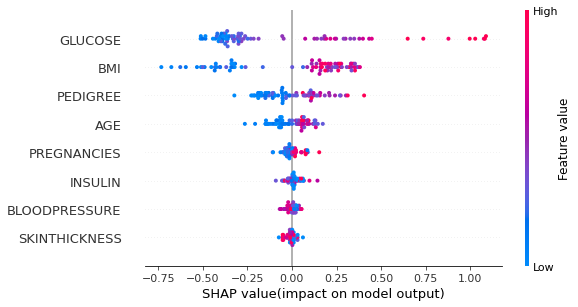

In [16]:
from hana_ml.visualizers.model_debriefing import TreeModelDebriefing

shapley_explainer = TreeModelDebriefing.shapley_explainer(pred_res, diabetes_test, key='ID', label='CLASS')
shapley_explainer.summary_plot()

## Unified Report (support model storage)

In [17]:
from hana_ml.model_storage import ModelStorage

model_storage = ModelStorage(connection_context=connection_context)
gscv.estimator.name = 'HGBT' 
gscv.estimator.version = 1
model_storage.save_model(model=gscv.estimator)


In [18]:
from hana_ml.visualizers.unified_report import UnifiedReport

mymodel = model_storage.load_model('HGBT', 1)

UnifiedReport(mymodel).build().display()

['SKINTHICKNESS', 'BLOODPRESSURE', 'INSULIN', 'PREGNANCIES', 'AGE', 'PEDIGREE', 'BMI', 'GLUCOSE']
[0.016759312858493945, 0.02746366441634026, 0.03400863978846714, 0.04416857238501566, 0.04922907256297437, 0.1331791692276011, 0.20224047253695054, 0.49295109622415706]
In order to review the unified classification model report better, you need to adjust the size of the left area or hide the left area temporarily!


In [71]:
UnifiedReport(diabetes_test).build().display()

Generating dataset report...: 100%|███████████████████████████████████| 4/4 [00:33<00:00,  8.30s/it]
In order to review the dataset report better, you need to adjust the size of the left area or hide the left area temporarily!


## Text Mining Functions

cloud version vs on-premise version

data from PAL example

In [26]:
conn_onpremise = ConnectionContext(userkey="leiyiyao")
conn_cloud = ConnectionContext(userkey="raymondyao")

In [38]:
data = pd.DataFrame({"ID" : ['doc1', 'doc2', 'doc3', 'doc4', 'doc5', 'doc6'],
                     "CONTENT" : ['term1 term2 term2 term3 term3 term3',
                                  'term2 term3 term3 term4 term4 term4',
                                  'term3 term4 term4 term5 term5 term5',
                                  'term3 term4 term4 term5 term5 term5 term5 term5 term5',
                                  'term4 term6',
                                  'term4 term6 term6 term6'],
                     "CATEGORY" : ['CATEGORY_1', 'CATEGORY_1', 'CATEGORY_2', 'CATEGORY_2', 'CATEGORY_3', 'CATEGORY_3']})
df_test1 = pd.DataFrame({"CONTENT":["term2 term2 term3 term3"]})
df_test2 = pd.DataFrame({"CONTENT":["term3"]})
df_test3 = pd.DataFrame({"CONTENT":["doc3"]})
df_test4 = pd.DataFrame({"CONTENT":["term3"]})

In [29]:
df_onpremise = create_dataframe_from_pandas(connection_context=conn_onpremise, pandas_df=data, table_name="TM_DEMO", force=True)
df_cloud = create_dataframe_from_pandas(connection_context=conn_cloud, pandas_df=data, table_name="TM_DEMO", force=True)

100%|██████████| 1/1 [00:00<00:00,  3.45it/s]


### TFIDF (cloud only)

In [30]:
from hana_ml.text.tm import tf_analysis

tfidf= tf_analysis(df_cloud)
tfidf[0].head(3).collect()

,TM_TERMS,TM_TERM_TF_F,TM_TERM_IDF_F,TM_TERM_TF_V,TM_TERM_IDF_V
0,term1,1,1,0.030303,1.791759
1,term2,3,2,0.090909,1.098612
2,term3,7,4,0.212121,0.405465


### Text Classification

#### via reference data

In [36]:
from hana_ml.text.tm import text_classification

res, stat = text_classification(df_cloud.select(df_cloud.columns[0], df_cloud.columns[1]), df_cloud)
res.head(1).collect()

,ID,TARGET
0,doc1,CATEGORY_1


In [34]:
res = text_classification(df_onpremise.select(df_onpremise.columns[0], df_onpremise.columns[1]), df_onpremise)
res.head(1).collect()

,ID,RANK,CATEGORY_SCHEMA,CATEGORY_TABLE,CATEGORY_COLUMN,CATEGORY_VALUE,NEIGHBOR_COUNT,SCORE
0,doc1,1,"""PAL_USER""","""TM_CATEGORIZE_KNN_DT_352_REF_TBL""","""CATEGORY""",CATEGORY_1,1,0.5807794005266924131092309835366905


#### via calculated TFIDF (cloud only)

In [37]:
res, stat = text_classification(df_cloud.select(df_cloud.columns[0], df_cloud.columns[1]), tfidf)
res.head(1).collect()

,ID,TARGET
0,doc1,CATEGORY_1


In [40]:
from hana_ml.text.tm import get_related_doc, get_related_term, get_relevant_doc, get_relevant_term, get_suggested_term

df_test1_cloud = create_dataframe_from_pandas(connection_context=conn_cloud,
                                                        pandas_df=df_test1,
                                                        table_name="#TM_DATA1",
                                                        force=True)

df_test2_cloud = create_dataframe_from_pandas(connection_context=conn_cloud,
                                                        pandas_df=df_test2,
                                                        table_name="#TM_DATA2",
                                                        force=True)

df_test3_cloud = create_dataframe_from_pandas(connection_context=conn_cloud,
                                                        pandas_df=df_test3,
                                                        table_name="#TM_DATA3",
                                                        force=True)

df_test4_cloud = create_dataframe_from_pandas(connection_context=conn_cloud,
                                                        pandas_df=df_test4,
                                                        table_name="#TM_DATA4",
                                                        force=True)
df_test1_onpremise = create_dataframe_from_pandas(connection_context=conn_onpremise,
                                                    pandas_df=df_test1,
                                                    table_name="TM_DATA1",
                                                    force=True)

df_test2_onpremise = create_dataframe_from_pandas(connection_context=conn_onpremise,
                                                    pandas_df=df_test2,
                                                    table_name="TM_DATA2",
                                                    force=True)

df_test3_onpremise = create_dataframe_from_pandas(connection_context=conn_onpremise,
                                                    pandas_df=df_test3,
                                                    table_name="TM_DATA3",
                                                    force=True)

df_test4_onpremise = create_dataframe_from_pandas(connection_context=conn_onpremise,
                                                    pandas_df=df_test4,
                                                    table_name="TM_DATA4",
                                                    force=True)

100%|██████████| 1/1 [00:00<00:00, 38.67it/s]


### get related doc

In [42]:
get_related_doc(df_test1_cloud, tfidf).collect()

,ID,SCORE
0,doc2,0.891550
1,doc1,0.804670
2,doc3,0.042024
3,doc4,0.021225


In [52]:
grd_onpremise = get_related_doc(df_test1_onpremise, df_onpremise)
print(grd_onpremise.select_statement)


                            SELECT T.* FROM TM_GET_RELATED_DOCUMENTS(
                                DOCUMENT (SELECT * FROM "TM_DATA1")
                                SEARCH "CONTENT"
                                FROM "PAL_USER"."TM_GET_RELATED_DOCUMENTS_DT_352_TBL"
                                RETURN
                                TOP DEFAULT
                                ID) AS T


In [53]:
grd_onpremise.collect()

,ID,RANK,TOTAL_TERM_COUNT,TERM_COUNT,CORRELATIONS,FACTORS,ROTATED_FACTORS,CLUSTER_LEVEL,CLUSTER_LEFT,CLUSTER_RIGHT,HIGHLIGHTED_DOCUMENT,HIGHLIGHTED_TERMTYPES,SCORE
0,doc2,1,6,3,None,None,None,None,None,None,None,None,0.8915504731053067732915451415465213
1,doc1,2,6,3,None,None,None,None,None,None,None,None,0.8046698732333942283290184604993556
2,doc3,3,6,3,None,None,None,None,None,None,None,None,0.04202449735779462125506711345224176
3,doc4,4,9,3,None,None,None,None,None,None,None,None,0.02122540837399113089478674964993843


### get related term

In [54]:
get_related_term(df_test2_cloud, df_cloud).collect()

,ID,SCORE
0,term3,1.000000
1,term2,0.923760
2,term1,0.774597
3,term4,0.550179
4,term5,0.346410


In [55]:
grt_onpremise = get_related_term(df_test2_onpremise, df_onpremise)
print(grt_onpremise.select_statement)


                            SELECT * FROM TM_GET_RELATED_TERMS(
                                TERM 'term3'
                                SEARCH "CONTENT"
                                FROM "PAL_USER"."TM_GET_RELATED_TERMS_DT_352_TBL"
                                RETURN
                                TOP DEFAULT)


In [56]:
grt_onpremise.collect()

,RANK,TERM,NORMALIZED_TERM,TERM_TYPE,TERM_FREQUENCY,DOCUMENT_FREQUENCY,CORRELATIONS,FACTORS,ROTATED_FACTORS,CLUSTER_LEVEL,CLUSTER_LEFT,CLUSTER_RIGHT,SCORE
0,1,term3,term3,noun,7,4,None,None,None,None,None,None,1.000000361379482338719526524073444
1,2,term2,term2,noun,3,2,None,None,None,None,None,None,0.9237607645314674931213971831311937
2,3,term1,term1,noun,1,1,None,None,None,None,None,None,0.7745969491648266869177064108953346
3,4,term4,term4,noun,9,5,None,None,None,None,None,None,0.5501794128048571597133786781341769
4,5,term5,term5,noun,9,2,None,None,None,None,None,None,0.3464102866993003515538873671175679


### get relevant doc

In [57]:
get_relevant_doc(df_test2_cloud, df_cloud).collect()

,ID,SCORE
0,doc1,0.774597
1,doc2,0.516398
2,doc3,0.258199
3,doc4,0.258199


In [59]:
grvd_onpremise = get_relevant_doc(pred_data=df_test2_onpremise, ref_data=df_onpremise, top=4)
print(grvd_onpremise.select_statement)


                            SELECT T.* FROM TM_GET_RELEVANT_DOCUMENTS(
                                TERM 'term3'
                                SEARCH "CONTENT"
                                FROM "PAL_USER"."TM_GET_RELEVANT_DOCUMENTS_DT_352_TBL"
                                RETURN
                                TOP 4
                                ID) AS T


In [61]:
grvd_onpremise.collect()

,ID,RANK,TOTAL_TERM_COUNT,TERM_COUNT,CORRELATIONS,FACTORS,ROTATED_FACTORS,CLUSTER_LEVEL,CLUSTER_LEFT,CLUSTER_RIGHT,HIGHLIGHTED_DOCUMENT,HIGHLIGHTED_TERMTYPES,SCORE
0,doc1,1,6,3,None,None,None,None,None,None,None,None,0.7745969491648266869177064108953346
1,doc2,2,6,3,None,None,None,None,None,None,None,None,0.5163979661098845319600059156073257
2,doc3,3,6,3,None,None,None,None,None,None,None,None,0.2581989830549422659800029578036629
3,doc4,4,9,3,None,None,None,None,None,None,None,None,0.2581989830549422659800029578036629


### get relevant term

In [62]:
get_relevant_term(df_test4_cloud, df_cloud).collect()

,ID,SCORE
0,term3,1.0


In [64]:
grvt_onpremise = get_relevant_term(df_test4_onpremise, df_onpremise)
print(grvt_onpremise.select_statement)


                            SELECT * FROM TM_GET_RELEVANT_TERMS(
                                DOCUMENT (SELECT * FROM "TM_DATA4")
                                SEARCH "CONTENT"
                                FROM "PAL_USER"."TM_GET_RELEVANT_TERMS_DT_352_TBL"
                                RETURN
                                TOP DEFAULT)


In [65]:
grvt_onpremise.collect()

,RANK,TERM,NORMALIZED_TERM,TERM_TYPE,TERM_FREQUENCY,DOCUMENT_FREQUENCY,CORRELATIONS,FACTORS,ROTATED_FACTORS,CLUSTER_LEVEL,CLUSTER_LEFT,CLUSTER_RIGHT,SCORE
0,1,term3,term3,noun,7,4,None,None,None,None,None,None,1.000002901113076436701021521002986


### get suggested term

In [66]:
get_suggested_term(df_test4_cloud, df_cloud).collect()

,ID,SCORE
0,term3,1.0


In [69]:
gst_onpremise = get_suggested_term(df_test4_onpremise, df_onpremise)
print(gst_onpremise.select_statement)


                            SELECT * FROM TM_GET_SUGGESTED_TERMS(
                                TERM 'term3'
                                SEARCH "CONTENT"
                                FROM "PAL_USER"."TM_GET_SUGGESTED_TERMS_DT_352_TBL"
                                RETURN
                                TOP DEFAULT)


In [68]:
gst_onpremise.collect()

,RANK,TERM,NORMALIZED_TERM,TERM_TYPE,TERM_FREQUENCY,DOCUMENT_FREQUENCY,SCORE
0,1,term3,term3,noun,7,4,0.999999999999999888977697537484346
